# 1. Adım Veri Anlama ve Veri Temizleme / EDA

## Mağaza Satışlarının Tahminlenmesi - Walmart

Şirketlerin işlerini daha verimli hale getirmek için kısa ve uzun vadeli planları vardır. Gelecekteki satışları tahmin etmek, bir şirket için en önemli planlardan biridir. Satış tahmini, şirkete stokların düzenlenmesi, gelirin hesaplanması ve yeni yatırım yapma kararı verilmesi konusunda fikir verir. Talep arttığında, şirketin stokta daha fazla mal olması gerekir. Dolayısıyla artan talebi karşılamak için arzlarını planlamaları gerekiyor. Ayrıca satışlar şirketin finansal planlarını etkiler. Doğru bir tahmin ile firma bütçe ayarlayabilir ve yeni yatırım/mağaza kapatma veya fiyat politikasını değiştirme kararı alabilir. Gelecek satışları bilmenin bir diğer avantajı da sezon başından itibaren belirlenen hedeflere ulaşılmasının hisse senedi fiyatlarına ve yatırımcıların algılarına olumlu etki yapabilmesidir. Ayrıca, öngörülen hedefe ulaşılmaması, tam tersine hisse senedi fiyatlarına önemli ölçüde zarar verebilir.

Walmart ayrıca geçmiş indirim verilerini kullanarak mağaza satışlarını tahmin etmek için Kaggle'da rekabet etmeye başladı. Bu yarışmada farklı bölgelerde bulunan 45 Walmart mağazasının (81 departmanlı) geçmiş satış verileri iş arayanlara sunuldu. Ayrıca, tatiller ve tatil indirim etkinlikleri, satışları açıkça etkilediği için verilere eklendi.

## Veri Temizlemenin Amacı

Bu çalışmanın amacı, bulmuş olduğum verileri anlama, hazırlama ve keşfetmedir. Bu defterde verileri indireceğim, farklı veri kümelerini birleştireceğim ve sütunların birbirleriyle ve hedefle etkileşimlerini görselleştirmeler yardımıyla anlamaya çalışacağım. Ayrıca hangi sütunların temizlenmesi gerektiğini de keşfedeceğim. Ardından verilerimi modellemeye hazırlayacağım..

## Veri kaynağı


Veriler Kaggle'dan elde edilir. 2010'dan 2012'ye kadar 45 Walmart mağazası için toplanmıştır. Eğitim, test, gönderim formatı, özellikler ve mağaza için 5 farklı veri seti bulunmaktadır. Tahmine dayalı bir model oluşturmak için 3 veri seti kullandım. Eğitim seti mağaza satış departmanı bazlı içerir. Mağaza seti, mağazaların türünü ve boyutunu içerir. Özellikler seti, günlük olarak tüketici fiyat endeksi, işsizlik oranı, indirimler, yakıt fiyatı ve sıcaklık sütunlarını içerir.

Tüm özellikleri birleştirdikten sonra, temizlik öncesi analiz için 421570 satır ve 16 sütunumuz olacak.

## Gerekli Kütüphanelerin Kullanılması

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math

In [2]:
pd.options.display.max_columns=100 # to see columns 

In [3]:
df_store = pd.read_csv('stores.csv') #store data

In [4]:
df_train = pd.read_csv('train.csv') # train set

In [5]:
df_features = pd.read_csv('features.csv') #external information

# Verilere İlk Bakış ve Üç Veri Çerçevesini Birleştirme

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [11]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [12]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [13]:
df.shape

(421570, 16)

# Sütunların İncelenmesi

## Mağaza ve Departman Numaraları

In [14]:
df['Store'].nunique() # number of different values

45

In [15]:
df['Dept'].nunique() # number of different values

81

Şimdi, temiz  veriler olup olmadığını görmek için her mağaza ve her departman için haftalık ortalama satışlara bakacağım. Mağazalar için 45 mağaza ve 81 departman bulunmaktadır.

In [16]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

Mağaza numaraları 1'den 45'e kadar, departman numaraları 1'den 99'a kadardır, ancak 88 veya 89 olmadığı gibi bazı numaralar eksiktir. Toplam departman sayısı 81'dir.

Pivot tablodan haftalık satışlar için 0 ve eksi değerlerin olması gibi bazı yanlış değerlerin olduğu açıkça görülmektedir. Ancak satış tutarı eksi olamaz. Ayrıca bir departmanın bütün hafta boyunca hiçbir şey satmaması da mümkün değil. Bu yüzden bu değerleri hesaplamaya eklememeliyiz.

In [17]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682,A,151315
4851,1,54,2011-05-20,-15.00,False,67.63,3.907,NaN,NaN,NaN,NaN,NaN,215.733920,7.682,A,151315
5342,1,47,2011-07-08,-198.00,False,85.83,3.480,NaN,NaN,NaN,NaN,NaN,215.277175,7.962,A,151315
5691,1,47,2011-08-12,0.00,False,90.76,3.638,NaN,NaN,NaN,NaN,NaN,215.605788,7.962,A,151315
5762,1,47,2011-08-19,0.00,False,89.94,3.554,NaN,NaN,NaN,NaN,NaN,215.669311,7.962,A,151315


421570 satırda 1358 satır %0,3 anlamına geliyor, bu yüzden yanlış satış değerleri içeren bu satırları silip yok sayabilirim.

In [18]:
df = df.loc[df['Weekly_Sales'] > 0]

In [19]:
df.shape # new data shape

(420212, 16)

## Gün

In [21]:
df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

Verilerimiz 5 Şubat 2010'dan 26 Ekim 2012'ye kadardır.

## IsHoliday - Tatil Sütunu

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


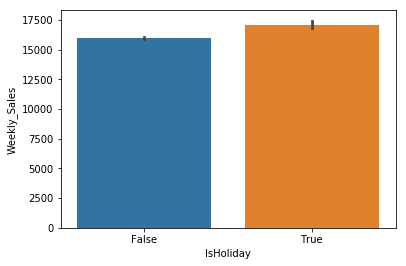

In [22]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [23]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [24]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133



Tüm tatiller verilerde yoktur. 4 adet tatil değeri eklenmiştir;

Super Bowl: 12-Şub-10, 11-Şub-11, 10-Şub-12, 8-Şub-13

İşçi Bayramı: 10-Eylül-10, 9-Eylül-11, 7-Eylül-12, 6-Eylül-13

Şükran Günü: 26-Kasım-10, 25-Kasım-11, 23-Kasım-12, 29-Kasım-13

Noel: 31-Aralık-10, 30-Aralık-11, 28-Aralık-12, 27-Aralık-13

07-Eylül-2012 tatilinden sonra tahmin için test setinde. Verilere baktığımızda, tatiller için haftalık ortalama satışların tatil olmayan günlere göre oldukça yüksek olduğu görülüyor. Tren verilerinde tatil olmayanlar için 133 hafta, tatiller için 10 hafta var.

Tatil türleri arasındaki farkları görmek istiyorum. Bu yüzden 4 tür tatil için yeni sütunlar oluşturuyorum ve bunları boole değerleriyle dolduruyorum. Tarih bu tatil türüne aitse, Yanlış değilse Doğru'dur.

In [28]:
# Super bowl Eğitim Seti
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [38]:
# İşçi Bayramı Eğitim Seti
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'İşçi Bayramı Haftası'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'İşçi Bayramı Haftası'] = False

In [39]:
# Şükran Günü Eğitim Seti
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Şükran Günü Haftası'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Şükran Günü Haftası'] = False

In [33]:
#Noel Eğitim Seti
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Noel Haftası'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Noel Haftası'] = False

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


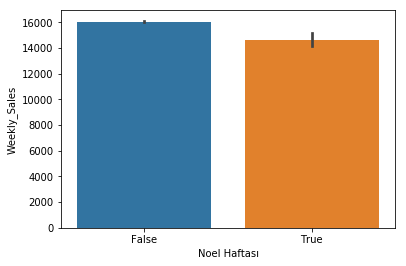

In [35]:
sns.barplot(x='Noel Haftası', y='Weekly_Sales', data=df) #Noel Haftası ya da değil karşılaştırması

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


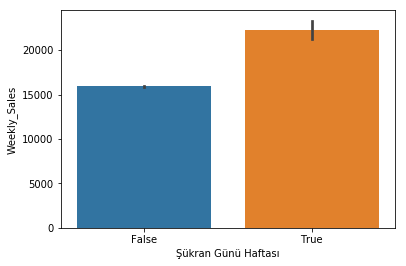

In [41]:
sns.barplot(x='Şükran Günü Haftası', y='Weekly_Sales', data=df) 

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


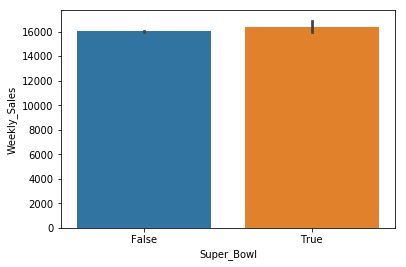

In [42]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl 

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


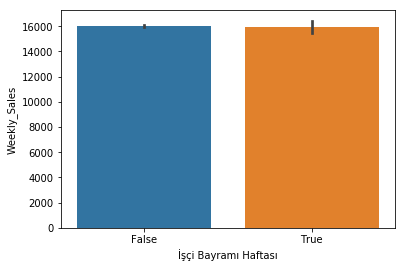

In [44]:
sns.barplot(x='İşçi Bayramı Haftası', y='Weekly_Sales', data=df) # İşçi Bayramı

Grafikler için İşçi Bayramı ve Noel'in haftalık ortalama satışları artırmadığı gösterilmiştir. Super Bowl'da satışlara olumlu etkisi var ama en büyük fark Şükran Günü'nde. Sanırım insanlar genellikle Noel hediyelerini Noel'den 1-2 hafta önce almayı tercih ediyor, bu yüzden Noel haftasındaki satışları değiştirmiyor. Ayrıca Şükran Günü haftasında Kara Cuma indirimleri var.

## Tatillerin Etkilerinin Analiz Edilmesi

In [45]:
df.groupby(['Noel Haftası','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Noel Haftası  Type
False         A       20174.350209
              B       12301.986116
              C        9570.951973
True          A       18310.167535
              B       11488.988057
              C        8031.520607
Name: Weekly_Sales, dtype: float64

In [46]:
df.groupby(['İşçi Bayramı Haftası','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

İşçi Bayramı Haftası  Type
False                 A       20151.210941
                      B       12294.954138
                      C        9542.098293
True                  A       20004.267422
                      B       12084.304642
                      C        9893.459258
Name: Weekly_Sales, dtype: float64

In [47]:
df.groupby(['Şükran Günü Haftası','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Şükran Günü Haftası  Type
False                A       20044.007801
                     B       12197.717405
                     C        9547.377807
True                 A       27397.776346
                     B       18733.973971
                     C        9696.566616
Name: Weekly_Sales, dtype: float64

In [48]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

## Mağaza türlerinin yüzdelerini çıkarırsak : 

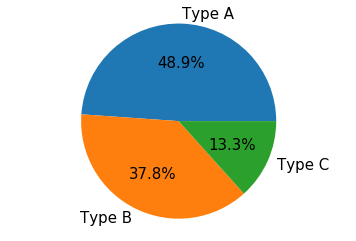

In [49]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [50]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

Mağazaların yaklaşık yarısı A tipine ait.

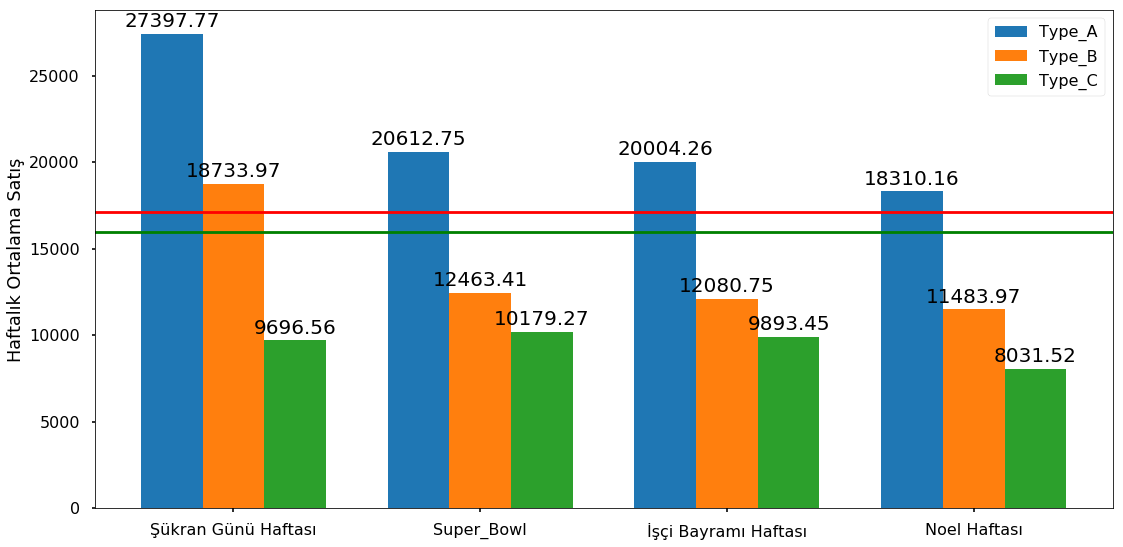

In [51]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Şükran Günü Haftası', 'Super_Bowl', 'İşçi Bayramı Haftası', 'Noel Haftası']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Haftalık Ortalama Satış')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

Grafikten en yüksek satış ortalamasının tatiller arasındaki Şükran Günü haftasında olduğu görülmektedir. Ve tüm tatiller için A Tipi mağazalar en yüksek satışlara sahiptir.

In [52]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Noel Haftası,Şükran Günü Haftası,İşçi Bayramı Haftası
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False,False,True,False


Ayrıca, haftalık en yüksek 5 satışın Şükran Günü haftalarına ait olması şaşırtıcı değildir.

In [54]:
df_store.groupby('Type').describe()['Size'].round(2) 

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


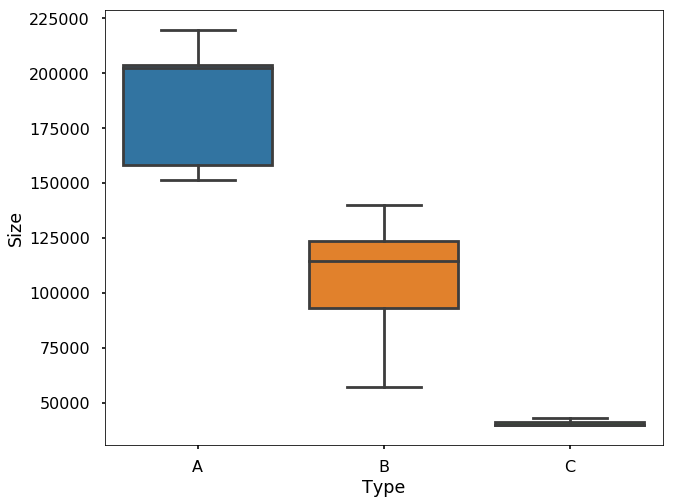

In [55]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

Mağaza türlerinin büyüklüğü, beklendiği gibi satışlarla tutarlıdır. Daha büyük mağazalar daha yüksek satışlara sahiptir. mağazaları büyüklüklerine göre grafiğe göre sınıflandırır. Type A'nın en küçük boyut değerinden sonra Type B başlar. Type B'nin en küçük boyut değerinden sonra Type C başlar.

# Veride Markdown olarak adladırılmış sütunların incelenmesi

Anaveride, indirimlerin satışlar üzerindeki etkisini görmek için indirim sütunları verilmiştir. Sütunları kontrol ettiğimde, indirimler için birçok NaN değeri var. Onları 0 ile değiştirmeye karar verdim çünkü satırda markdown varsa sayılarla gösteriliyor. Yani 0 yazabiliyorsam o tarihte indirim olmadığını gösteriyor.

In [56]:
df.isna().sum()

Store                        0
Dept                         0
Date                         0
Weekly_Sales                 0
IsHoliday                    0
Temperature                  0
Fuel_Price                   0
MarkDown1               270031
MarkDown2               309308
MarkDown3               283561
MarkDown4               285694
MarkDown5               269283
CPI                          0
Unemployment                 0
Type                         0
Size                         0
Super_Bowl                   0
Labor_Day                    0
Thanksgiving                 0
Christmas                    0
Noel Haftası                 0
Şükran Günü Haftası          0
İşçi Bayramı Haftası         0
dtype: int64

In [57]:
df = df.fillna(0) # filling null's with 0

In [58]:
df.isna().sum() # last null check

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Type                    0
Size                    0
Super_Bowl              0
Labor_Day               0
Thanksgiving            0
Christmas               0
Noel Haftası            0
Şükran Günü Haftası     0
İşçi Bayramı Haftası    0
dtype: int64

In [59]:
df.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Minimum value for weekly sales is 0.01. Most probably, this value is not true but I prefer not to change them now. Because, there are many departments and many stores. It takes too much time to check each department for each store (45 store for 81 departments). So, I take averages for EDA. 

# Deeper Look in Sales

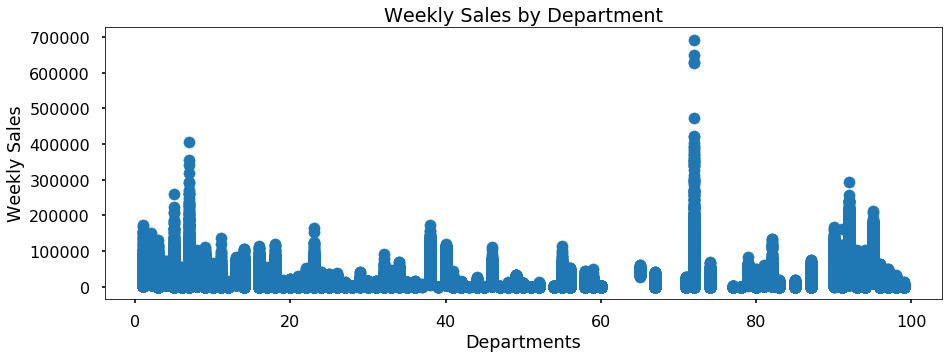

In [60]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


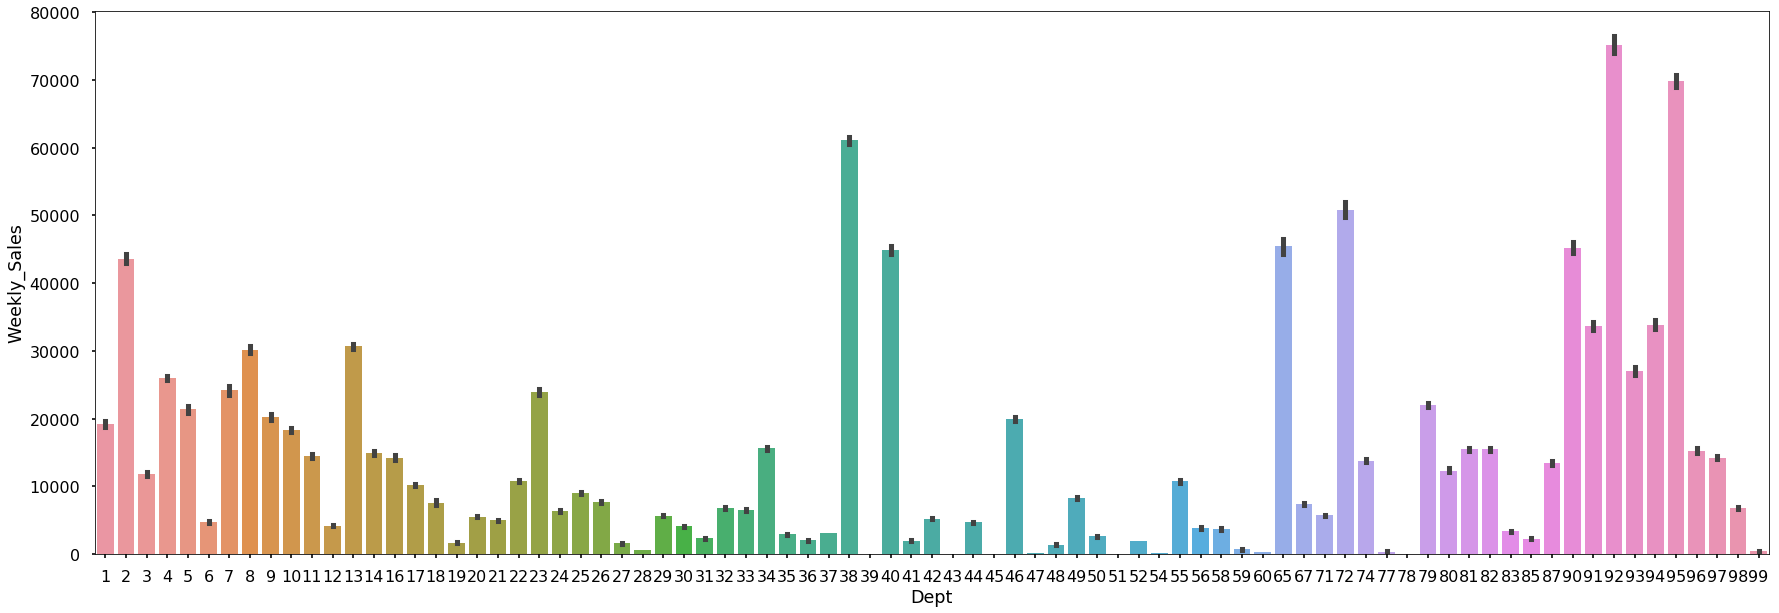

In [61]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

İlk grafikten 60-80 arası bir bölümün (72 olduğunu varsayıyorum) satış değerlerinin daha yüksek olduğu görülüyor. Ancak ortalamaları aldığımızda 92 numaralı bölümün satış ortalamasının daha yüksek olduğu görülmektedir. 72. bölüm sezonluk bölüm sanırım. Bazı mevsimlerde daha yüksek değerlere sahiptir ancak ortalama olarak 92 daha yüksektir

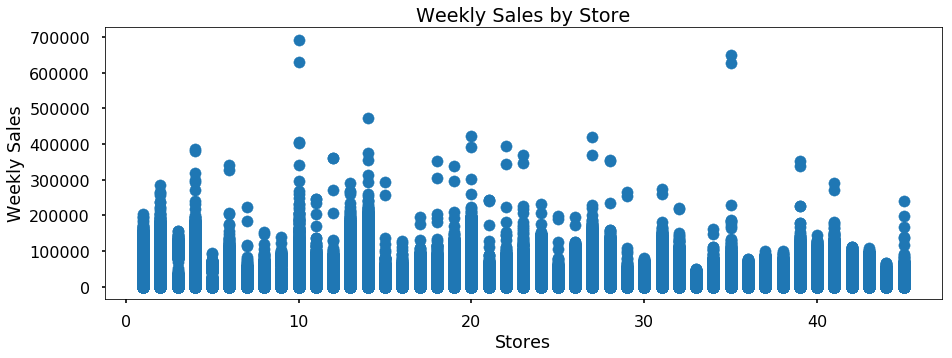

In [62]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


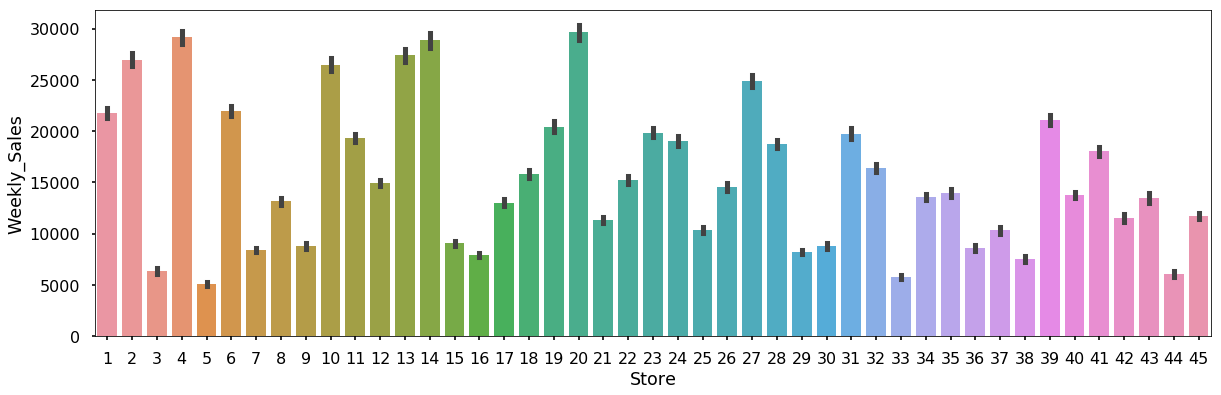

In [63]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

Aynı şey mağazalarda da oluyor. İlk grafikten, bazı mağazaların daha yüksek satışları var, ancak ortalama olarak 20 numaralı mağaza en iyisi ve onu 4 ve 14 numaralı mağaza takip ediyor.

# Tarihi Datetime Olarak Değiştirme ve Yeni Sütunlar Oluşturma

In [64]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [65]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [66]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

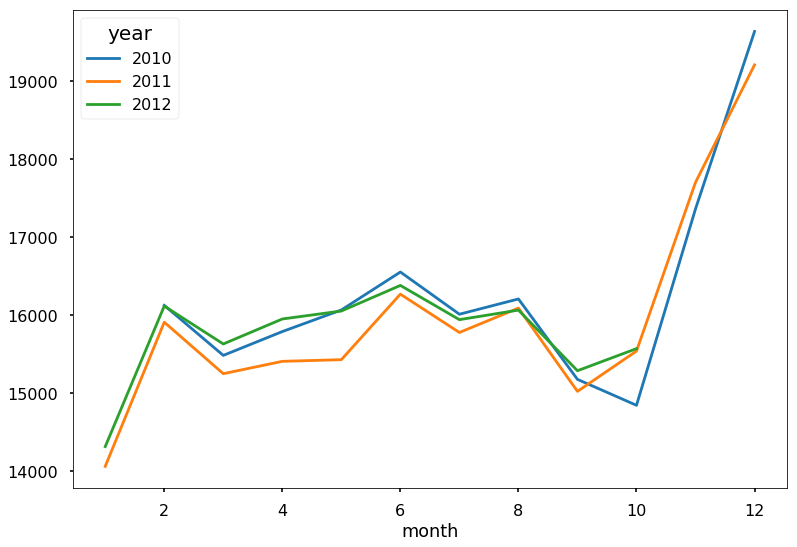

In [67]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

Grafikten 2011 yılının genel olarak 2010 yılına göre daha düşük satışlara sahip olduğu görülmektedir. Ortalama satışlara bakıldığında 2010 yılının daha yüksek değerlere sahip olduğu, ancak 2012 yılının Kasım ve Aralık ayı satışlarının daha yüksek olduğu hakkında bir bilgiye sahip olmadığı görülmektedir. 2012'nin son iki aylık satışı olmamasına rağmen ortalama 2010'a yakın. 2012 sonuçlarını alıp eklersek büyük ihtimalle ilk sırayı alacak.

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


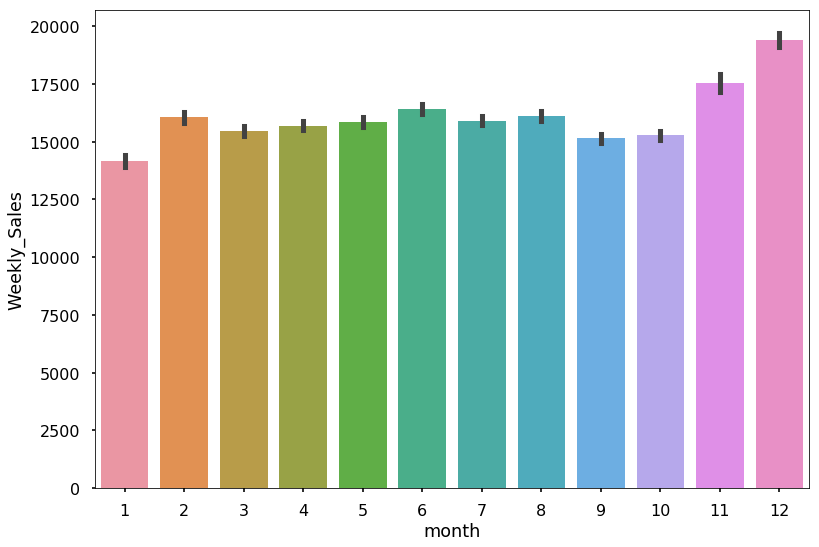

In [68]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

Yukarıdaki grafiğe baktığımızda en iyi satışlar beklendiği gibi Aralık ve Kasım aylarında gerçekleşiyor. En yüksek değerler Şükran Günü'ne aittir, ancak ortalamayı aldığımızda Aralık ayının en iyi değere sahip olduğu açıktır.

In [69]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Haftalık olarak ilk 5 satış ortalaması, Noel, Şükran Günü, Kara Cuma ve okulların kapalı olduğu Mayıs ayının 1-2 hafta öncesine aittir.

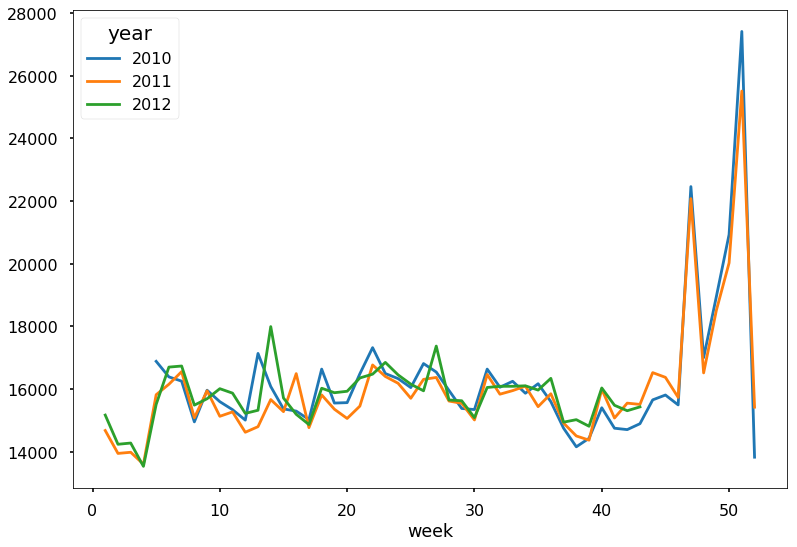

In [70]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


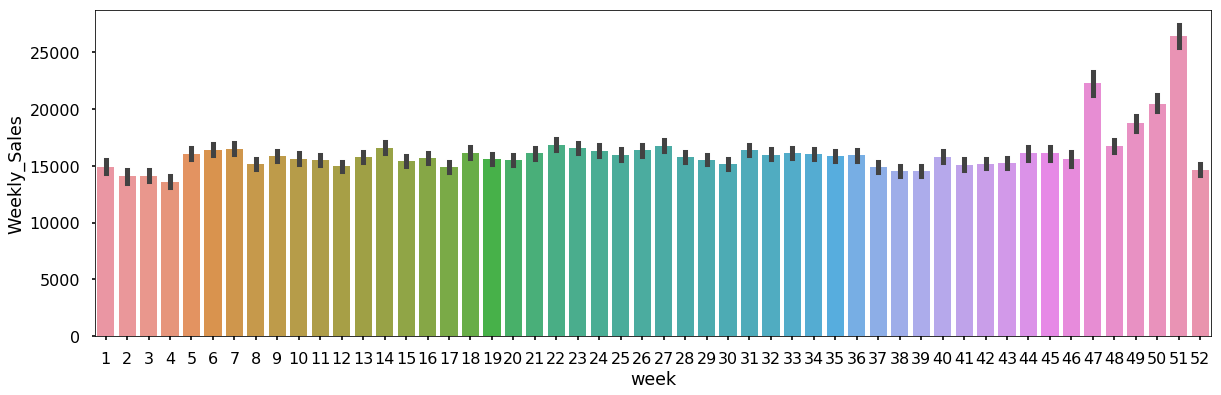

In [71]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

Grafiklerden Noel, Şükran Günü ve Kara Cuma etkileri olarak 51. hafta ve 47. haftaların anlamlı derecede yüksek ortalamalara sahip olduğu görülmektedir.

# Akaryakıt Fiyatı, TÜFE, İşsizlik, Sıcaklık Etkileri

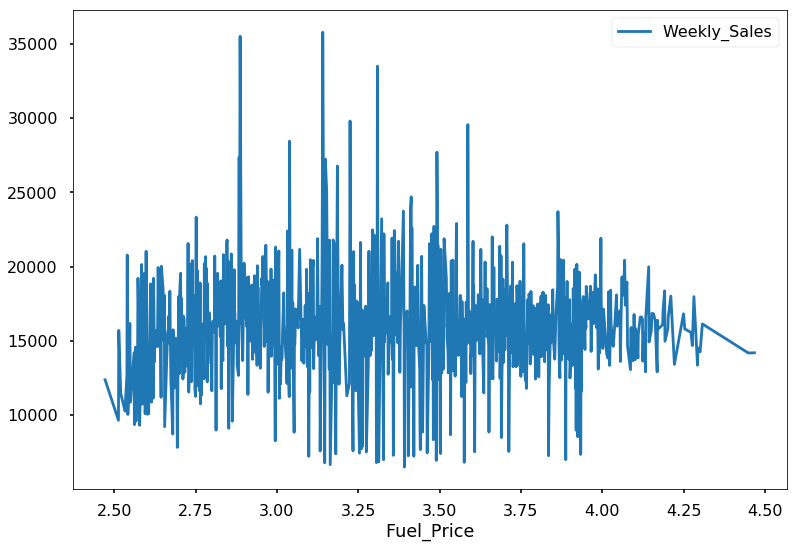

In [72]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

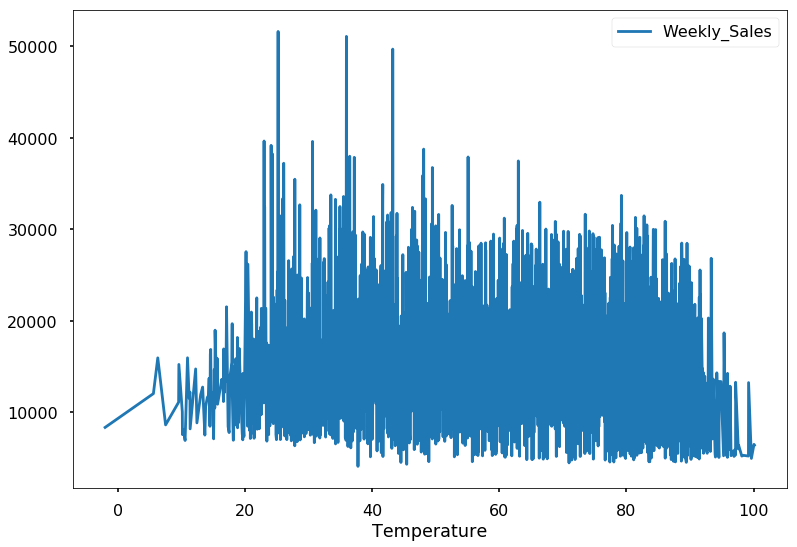

In [73]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

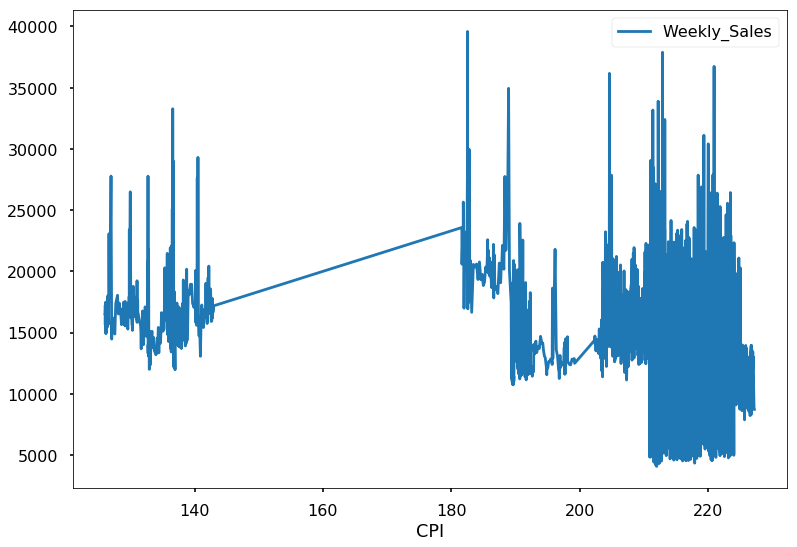

In [74]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

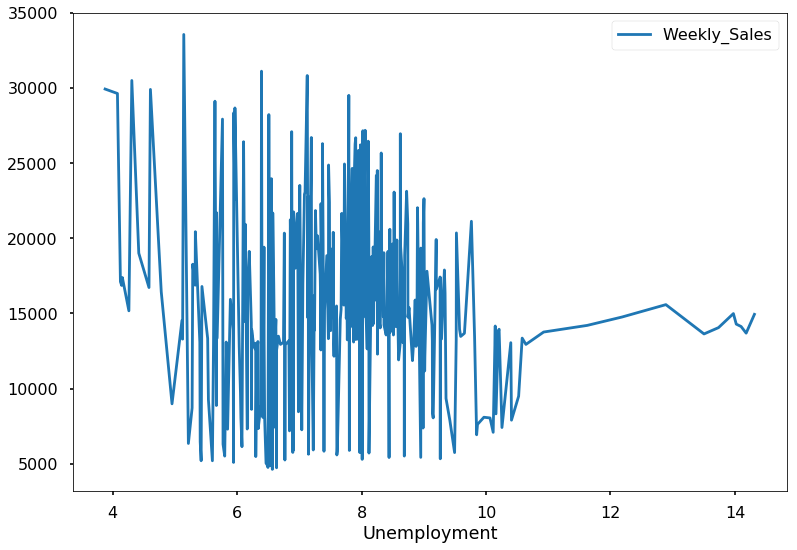

In [75]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

Grafiklerden TÜFE, sıcaklık, işsizlik oranı, akaryakıt fiyatı ile haftalık satışlar arasında anlamlı bir örüntünün olmadığı görülmektedir. 140-180 arası TÜFE için de veri yok.

In [76]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# Bulgular ve Araştırmalar

Verilerde çok fazla eksik değer yok. Tüm sütunlar kontrol edildi.
Haftalık satışı 0'dan yüksek olan satırları seçiyorum. Eksi değerler verilerin %0,3'üdür. Yani, onları düşürdüm.
İndirimlerdeki boş değerler sıfır olarak değiştirildi. Çünkü bu departmanda herhangi bir markdown yoksa null olarak yazılmıştır.
### Keşifler ve Bulgular
Datada 45 mağaza ve 81 departman bulunmaktadır. Departmanlar tüm mağazalarda aynı değildir.
72 numaralı departman haftalık satış değerlerinin daha yüksek olmasına rağmen, ortalama olarak 92 numaralı departman en iyisidir. Bazı bölümlerin Şükran Günü gibi mevsimsel olarak daha yüksek değerlere sahip olduğunu gösteriyor. Verilerdeki ilk 5 satışa baktığımızda tutarlıdır, hepsi Şükran Günü tatilinde 72. bölüme aittir.
10 ve 35 numaralı mağazaların haftalık satış değerleri bazen daha yüksek olsa da genel ortalamada 20 numaralı mağaza ve 4 numaralı mağaza birinci ve ikinci sırada yer almaktadır. Bu, bazı bölgelerde sezonluk satışların daha yüksek olduğu anlamına gelir.
Mağazaların boyutlarına göre A, B ve C olmak üzere 3 çeşidi vardır. Mağazaların neredeyse yarısı 150000'den büyük ve A kategorisine giriyor. Mağazaların satışları türlerine göre değişiyor.
Beklendiği gibi, tatil ortalama satışları normal tarihlerden daha yüksektir.
Noel tatili yılın son günleri olarak tanıtılır. Ancak insanlar genellikle 51. haftada alışveriş yapar. Dolayısıyla, tatillerin toplam satışlarına baktığımızda, Şükran Günü, Walmart tarafından atanan, aralarında daha yüksek satışlara sahiptir.
2010 yılı, 2011 ve 2012'den daha yüksek satışlara sahip. Ancak, Kasım ve Aralık satışları 2012'nin verilerinde yok. En yüksek satış ayları olmasa bile 2012, 2010'dan çok az değil, yani son iki ayı ekledikten sonra ilk olabilir.
51 ve 47. haftaların daha yüksek değerlere sahip olduğu ve bunları 50-48 haftaların takip ettiği açıkça görülmektedir. İlginç bir şekilde, 5. en çok satış yılın 22. haftasına aittir. Bu sonuçlar Noel, Şükran Günü ve Kara Cuma'nın satışlar için diğer haftalardan çok daha önemli olduğunu ve 5. önemli zamanın yılın 22. haftası olduğunu ve okulların kapalı olduğu Mayıs ayının sonu olduğunu göstermektedir. Büyük ihtimalle insanlar mayıs sonunda tatile hazırlanıyorlar.
Ocak ayı satışları diğer aylara göre çok daha az. Bu, Kasım ve Aralık aylarındaki yüksek satışların sonucudur. İki yüksek satış ayının ardından insanlar Ocak ayında daha az ödemeyi tercih ediyor.
TÜFE, sıcaklık, işsizlik oranı ve akaryakıt fiyatının haftalık satışlarda herhangi bir örüntüsü yok.


### GELECEK ÇALIŞMALAR 
Veriler daha fazla özellik mühendisliği gerektiriyor, ancak ilk fikir olarak, sonuçları ayrıntılı olarak görmek ve analiz etmek için hafta, yıl ve ay sütunları oluşturuldu. Hafta sütunu önemli bir özelliktir çünkü verilerimiz haftalıktır ve yılın hangi haftasındaki satışların önemli değişiklikler gösterdiğini görebiliriz.
Ayrıca tatiller, farklı tatillerdeki etkilerini görmek için Şükran Günü, Noel, İşçi Bayramı ve Süper Bowl olarak sütunlara ayrıldı. 
